In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
load_data = os.path.join("commit case interview.csv")

In [3]:
data_df = pd.read_csv(load_data)
data_df

,School_Name,number_of_students,number_of_4th_graders,%_economically_disadvantaged,%_Hispanic,%_African_American,%_English_Language_Learners,number_taking_BOY_math,number_passing_BOY_math,number_taking_EOY_math,...,%_teachers_using_PD_strategies,student_using_MathFast,number_of_computers_per_class,avg_lessons_completed_weekly,avg_time_per_lesson,Use_Summer_Math_Review,number_of_students_using_SMR,%_students_using_SMR,%_students_1_ hour_or_more_weekly,%_students_less_than_1_hr_weekly
0,A,500,90,95%,75%,20%,66%,90,17,90,...,NaN,Yes,1.6,1.2,13.6,Yes,90.0,56%,35%,65%
1,B,600,100,98%,88%,50%,67%,100,32,100,...,12%,Yes,3.5,3.3,5.2,No,NaN,NaN,NaN,NaN
2,C,400,70,90%,7%,80%,68%,70,19,70,...,51%,No,2.0,NaN,NaN,Yes,70.0,21%,49%,51%
3,D,300,55,84%,85%,5%,50%,55,21,55,...,NaN,Yes,0.7,1.2,8.5,Yes,55.0,26%,11%,89%
4,E,550,90,97%,20%,75%,25%,90,19,90,...,22%,Yes,0.5,1.8,12.0,No,90.0,NaN,NaN,NaN
5,F,650,105,96%,30%,66%,33%,105,38,105,...,NaN,No,2.6,NaN,NaN,Yes,105.0,70%,72%,28%
6,G,450,75,80%,90%,3%,24%,75,31,75,...,NaN,Yes,3.2,2.0,16.9,Yes,75.0,NaN,NaN,NaN
7,H,350,60,97%,72%,16%,40%,60,15,60,...,75%,Yes,0.4,0.5,16.0,Yes,60.0,76%,58%,42%
8,I,400,70,98%,74%,15%,16%,70,13,70,...,81%,Yes,4.0,4.0,4.4,Yes,70.0,40%,20%,80%
9,J,600,100,91%,88%,5%,10%,100,18,100,...,62%,Yes,2.0,1.8,5.4,No,NaN,NaN,NaN,NaN


In [4]:
# determine missing values in school data
data_df.isnull().sum()

School_Name                          0
number_of_students                   0
number_of_4th_graders                0
%_economically_disadvantaged         0
%_Hispanic                           0
%_African_American                   0
%_English_Language_Learners          0
number_taking_BOY_math               0
number_passing_BOY_math              0
number_taking_EOY_math               0
number_passing_EOY_math              0
teacher_attend_summer_PD             0
%_teachers_using_PD_strategies       4
student_using_MathFast               0
number_of_computers_per_class        0
avg_lessons_completed_weekly         2
avg_time_per_lesson                  2
Use_Summer_Math_Review               0
number_of_students_using_SMR         2
%_students_using_SMR                 4
%_students_1_ hour_or_more_weekly    4
%_students_less_than_1_hr_weekly     4
dtype: int64

In [5]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

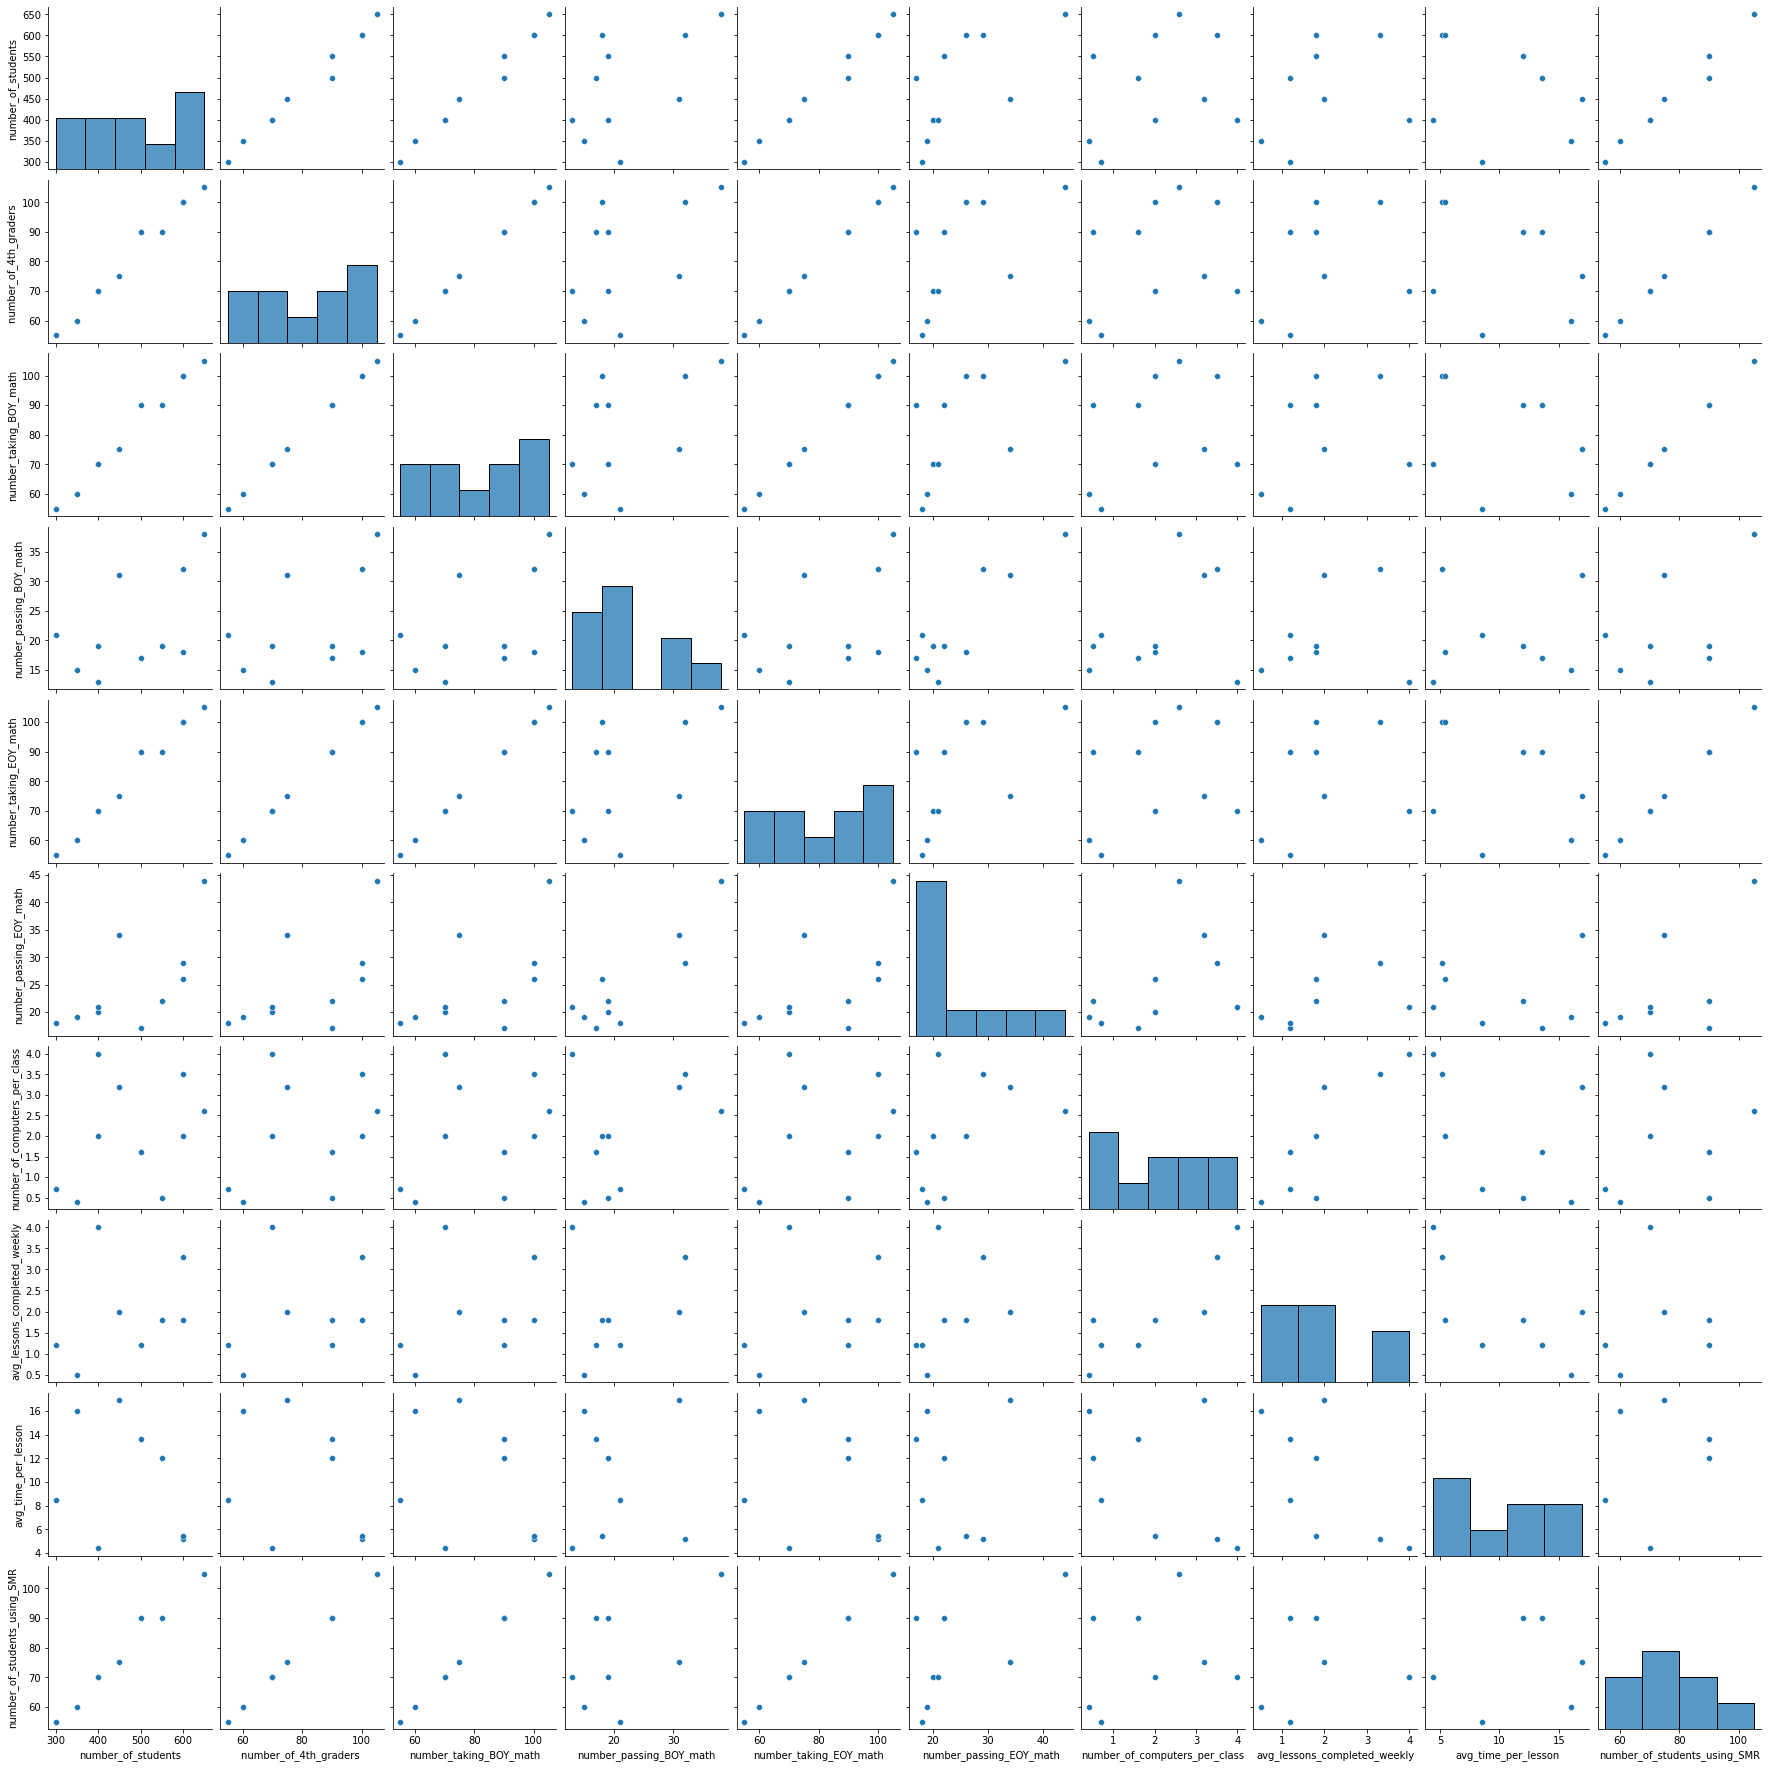

In [6]:
sns.pairplot(data_df)
plt.show()

In [7]:
# calculate percentage of passing students per campus (BOY)
percent_passing_boy = data_df["number_passing_BOY_math"] / data_df["number_taking_BOY_math"] * 100
percent_passing_boy

0    18.888889
1    32.000000
2    27.142857
3    38.181818
4    21.111111
5    36.190476
6    41.333333
7    25.000000
8    18.571429
9    18.000000
dtype: float64

In [8]:
# calculate percentage of passing students per campus (EOY)
percent_passing_eoy = data_df["number_passing_EOY_math"] / data_df["number_taking_EOY_math"] * 100
percent_passing_eoy

0    18.888889
1    29.000000
2    28.571429
3    32.727273
4    24.444444
5    41.904762
6    45.333333
7    31.666667
8    30.000000
9    26.000000
dtype: float64

In [9]:
# percent increase of BOY to EOY assesment results
percent_increase = (percent_passing_eoy - percent_passing_boy) / percent_passing_boy * 100
percent_increase

0     0.000000
1    -9.375000
2     5.263158
3   -14.285714
4    15.789474
5    15.789474
6     9.677419
7    26.666667
8    61.538462
9    44.444444
dtype: float64

In [10]:
# add column for percent passing BOY
data_df['percent_passing_BOY'] = percent_passing_boy

#add column for percent passing EOY
data_df['percent_passing_EOY'] = percent_passing_eoy

#add column for percent increase of BOY to EOY assesment results
data_df['percent_increase_BOY_to_EOY'] = percent_increase

data_df

,School_Name,number_of_students,number_of_4th_graders,%_economically_disadvantaged,%_Hispanic,%_African_American,%_English_Language_Learners,number_taking_BOY_math,number_passing_BOY_math,number_taking_EOY_math,...,avg_lessons_completed_weekly,avg_time_per_lesson,Use_Summer_Math_Review,number_of_students_using_SMR,%_students_using_SMR,%_students_1_ hour_or_more_weekly,%_students_less_than_1_hr_weekly,percent_passing_BOY,percent_passing_EOY,percent_increase_BOY_to_EOY
0,A,500,90,95%,75%,20%,66%,90,17,90,...,1.2,13.6,Yes,90.0,56%,35%,65%,18.888889,18.888889,0.000000
1,B,600,100,98%,88%,50%,67%,100,32,100,...,3.3,5.2,No,NaN,NaN,NaN,NaN,32.000000,29.000000,-9.375000
2,C,400,70,90%,7%,80%,68%,70,19,70,...,NaN,NaN,Yes,70.0,21%,49%,51%,27.142857,28.571429,5.263158
3,D,300,55,84%,85%,5%,50%,55,21,55,...,1.2,8.5,Yes,55.0,26%,11%,89%,38.181818,32.727273,-14.285714
4,E,550,90,97%,20%,75%,25%,90,19,90,...,1.8,12.0,No,90.0,NaN,NaN,NaN,21.111111,24.444444,15.789474
5,F,650,105,96%,30%,66%,33%,105,38,105,...,NaN,NaN,Yes,105.0,70%,72%,28%,36.190476,41.904762,15.789474
6,G,450,75,80%,90%,3%,24%,75,31,75,...,2.0,16.9,Yes,75.0,NaN,NaN,NaN,41.333333,45.333333,9.677419
7,H,350,60,97%,72%,16%,40%,60,15,60,...,0.5,16.0,Yes,60.0,76%,58%,42%,25.000000,31.666667,26.666667
8,I,400,70,98%,74%,15%,16%,70,13,70,...,4.0,4.4,Yes,70.0,40%,20%,80%,18.571429,30.000000,61.538462
9,J,600,100,91%,88%,5%,10%,100,18,100,...,1.8,5.4,No,NaN,NaN,NaN,NaN,18.000000,26.000000,44.444444


In [11]:
column_list = list(data_df)
column_list

['School_Name',
 'number_of_students',
 'number_of_4th_graders ',
 '%_economically_disadvantaged',
 '%_Hispanic',
 '%_African_American',
 '%_English_Language_Learners',
 'number_taking_BOY_math',
 'number_passing_BOY_math',
 'number_taking_EOY_math',
 'number_passing_EOY_math',
 'teacher_attend_summer_PD',
 '%_teachers_using_PD_strategies',
 'student_using_MathFast',
 'number_of_computers_per_class',
 'avg_lessons_completed_weekly',
 'avg_time_per_lesson',
 'Use_Summer_Math_Review',
 'number_of_students_using_SMR',
 '%_students_using_SMR',
 '%_students_1_ hour_or_more_weekly',
 '%_students_less_than_1_hr_weekly',
 'percent_passing_BOY',
 'percent_passing_EOY',
 'percent_increase_BOY_to_EOY']

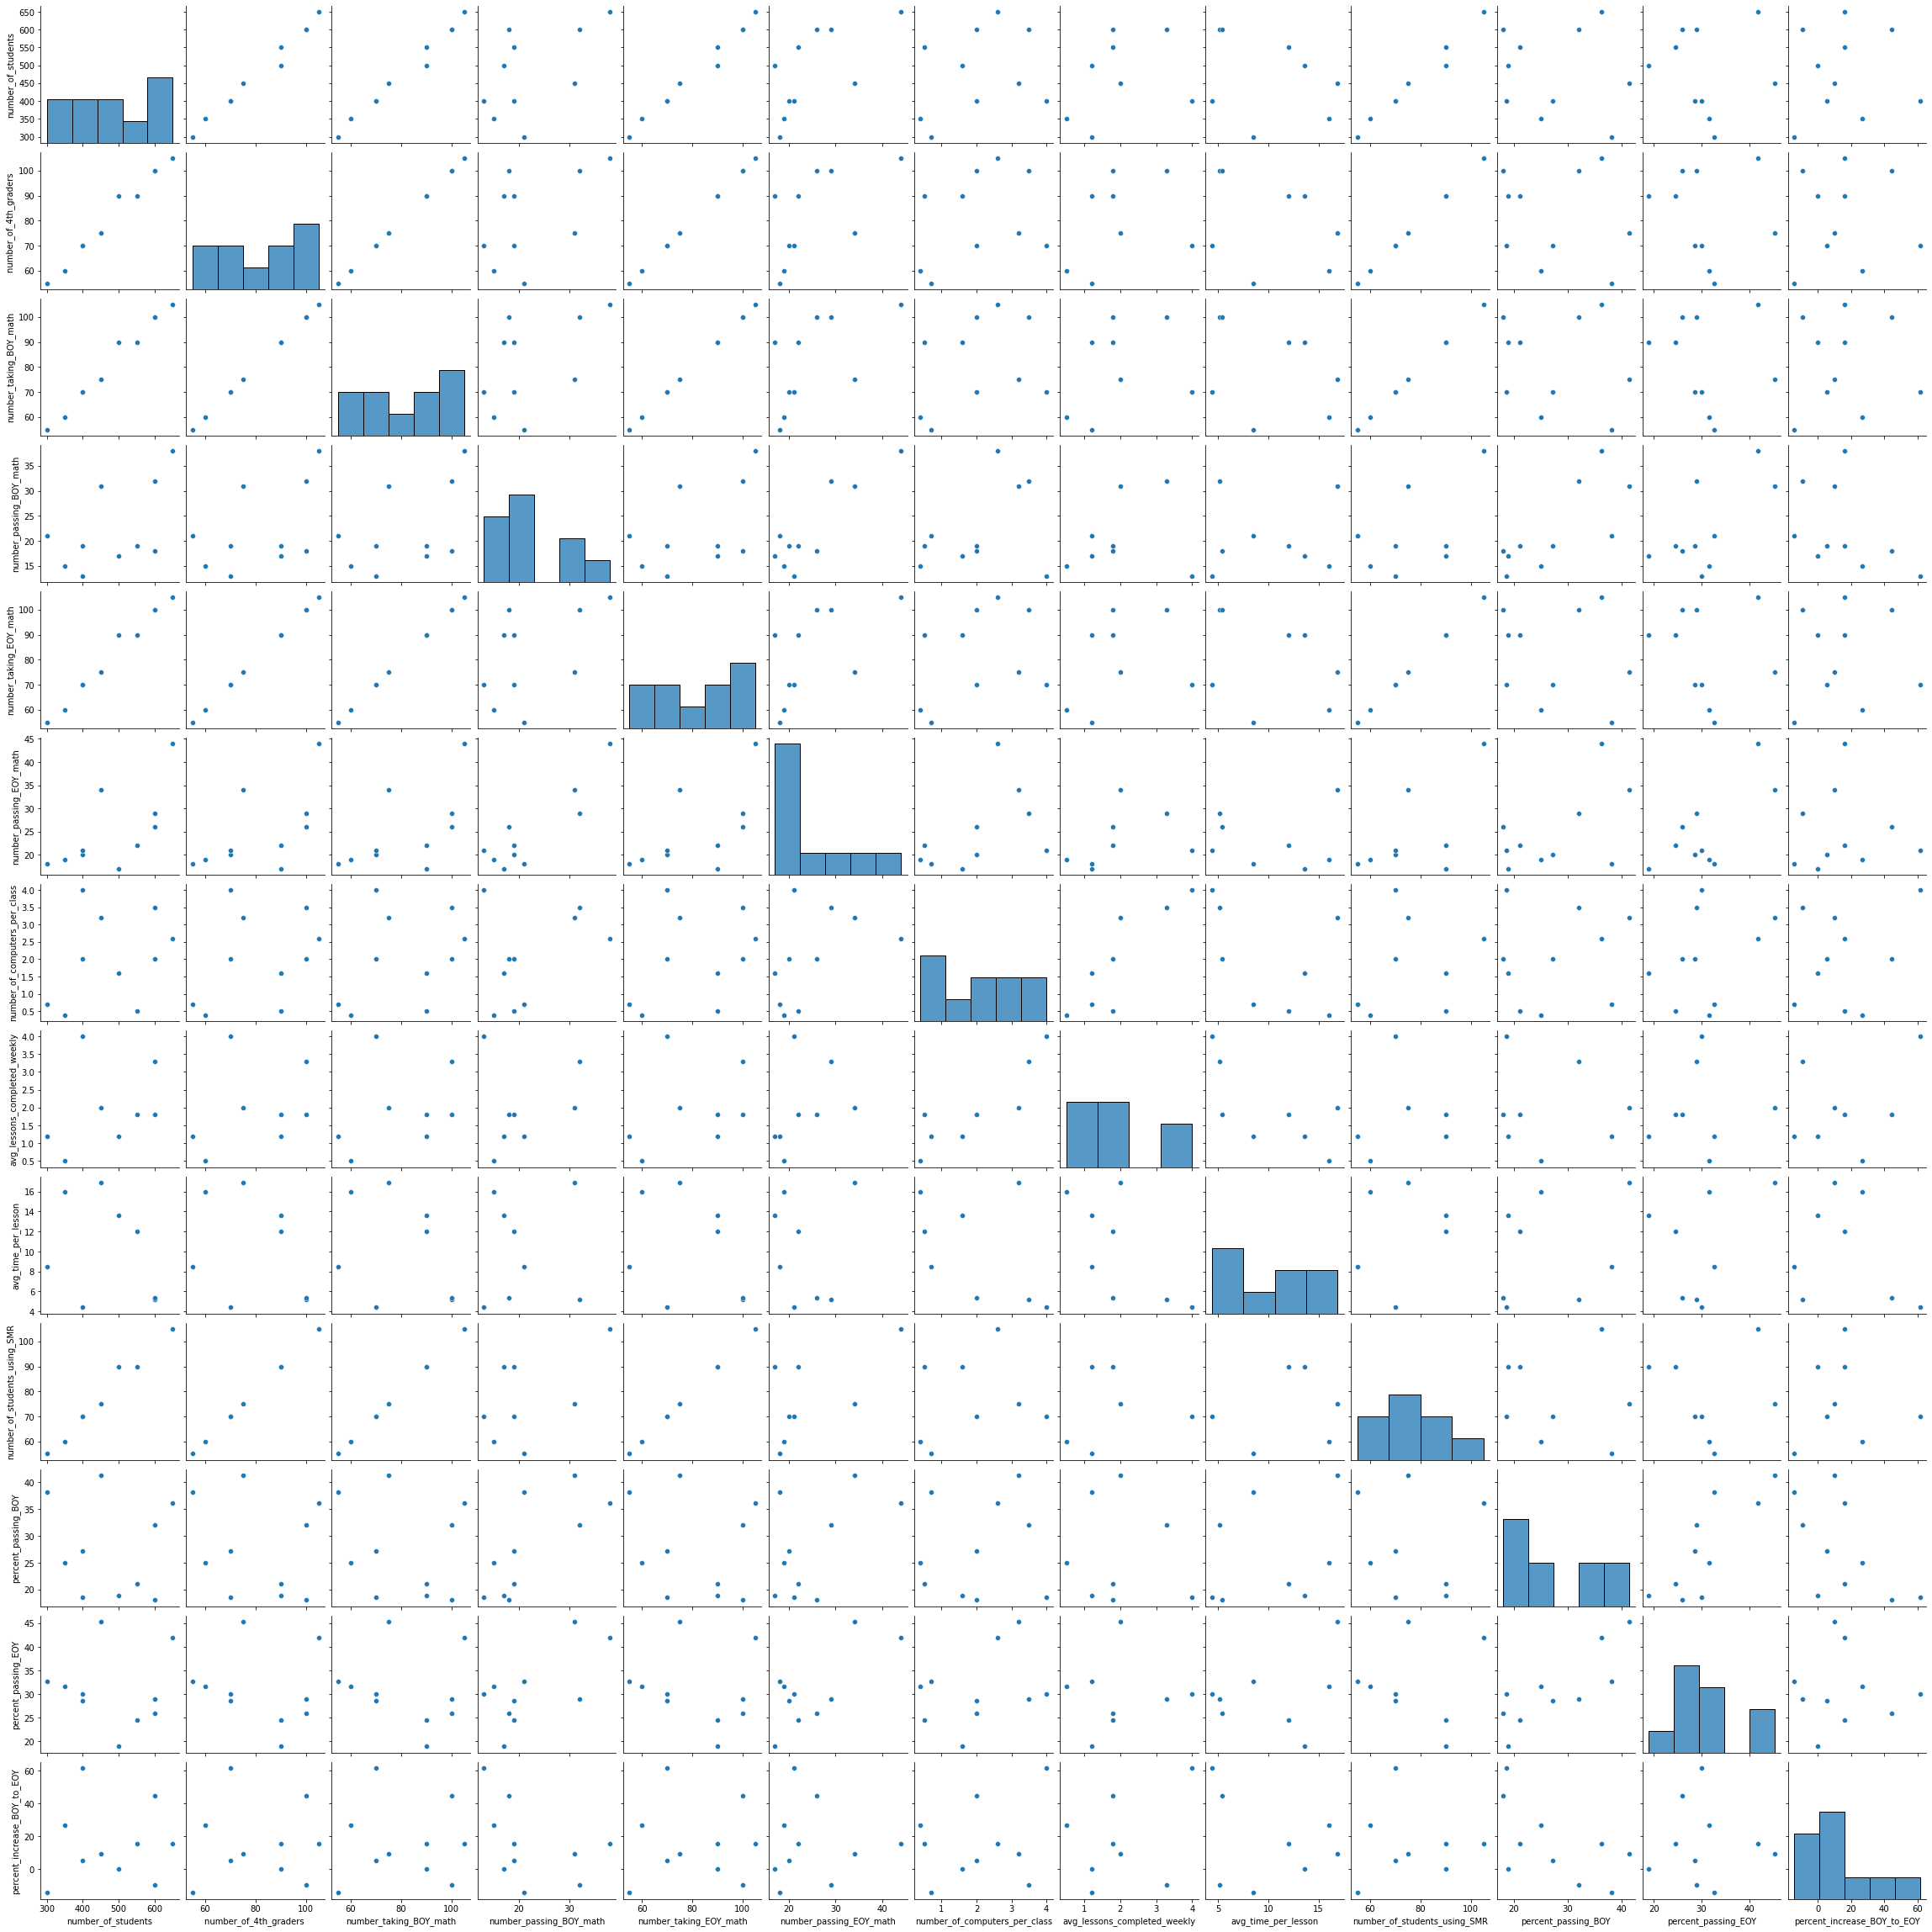

In [12]:
sns.pairplot(data_df)
plt.show()

In [13]:
data_df.to_csv('commit data updated.csv', index = False)

In [14]:
load_updated_data = os.path.join("commit data cleaned.csv")
data2_df = pd.read_csv(load_updated_data)
data2_df

,School_Name,number_of_4th_graders,percent_economically_disadvantaged,percent_Hispanic,percent_African_American,percent_English_Language_Learners,teacher_attend_summer_PD,percent_teachers_using_PD_strategies,student_using_MathFast,number_of_computers_per_class,avg_lessons_completed_weekly,avg_time_per_lesson,Use_Summer_Math_Review,percent_students_using_SMR,percent_students_1_ hour_or_more_weekly,percent_students_less_than_1_hr_weekly,percent_passing_BOY,percent_passing_EOY,percent_increase_BOY_to_EOY
0,A,90,95,75,20,66,No,NaN,Yes,1.6,1.2,13.6,Yes,56.0,35.0,65.0,19,19,0
1,B,100,98,88,50,67,Yes,12.0,Yes,3.5,3.3,5.2,No,NaN,NaN,NaN,32,29,-9
2,C,70,90,7,80,68,Yes,51.0,No,2.0,NaN,NaN,Yes,21.0,49.0,51.0,27,29,5
3,D,55,84,85,5,50,No,NaN,Yes,0.7,1.2,8.5,Yes,26.0,11.0,89.0,38,33,-14
4,E,90,97,20,75,25,Yes,22.0,Yes,0.5,1.8,12.0,No,NaN,NaN,NaN,21,24,16
5,F,105,96,30,66,33,No,NaN,No,2.6,NaN,NaN,Yes,70.0,72.0,28.0,36,42,16
6,G,75,80,90,3,24,No,NaN,Yes,3.2,2.0,16.9,Yes,NaN,NaN,NaN,41,45,10
7,H,60,97,72,16,40,Yes,75.0,Yes,0.4,0.5,16.0,Yes,76.0,58.0,42.0,25,32,27
8,I,70,98,74,15,16,Yes,81.0,Yes,4.0,4.0,4.4,Yes,40.0,20.0,80.0,19,30,62
9,J,100,91,88,5,10,Yes,62.0,Yes,2.0,1.8,5.4,No,NaN,NaN,NaN,18,26,44


In [15]:
column_list = list(data2_df)
column_list

['School_Name',
 'number_of_4th_graders ',
 'percent_economically_disadvantaged',
 'percent_Hispanic',
 'percent_African_American',
 'percent_English_Language_Learners',
 'teacher_attend_summer_PD',
 'percent_teachers_using_PD_strategies',
 'student_using_MathFast',
 'number_of_computers_per_class',
 'avg_lessons_completed_weekly',
 'avg_time_per_lesson',
 'Use_Summer_Math_Review',
 'percent_students_using_SMR',
 'percent_students_1_ hour_or_more_weekly',
 'percent_students_less_than_1_hr_weekly',
 'percent_passing_BOY',
 'percent_passing_EOY',
 'percent_increase_BOY_to_EOY']

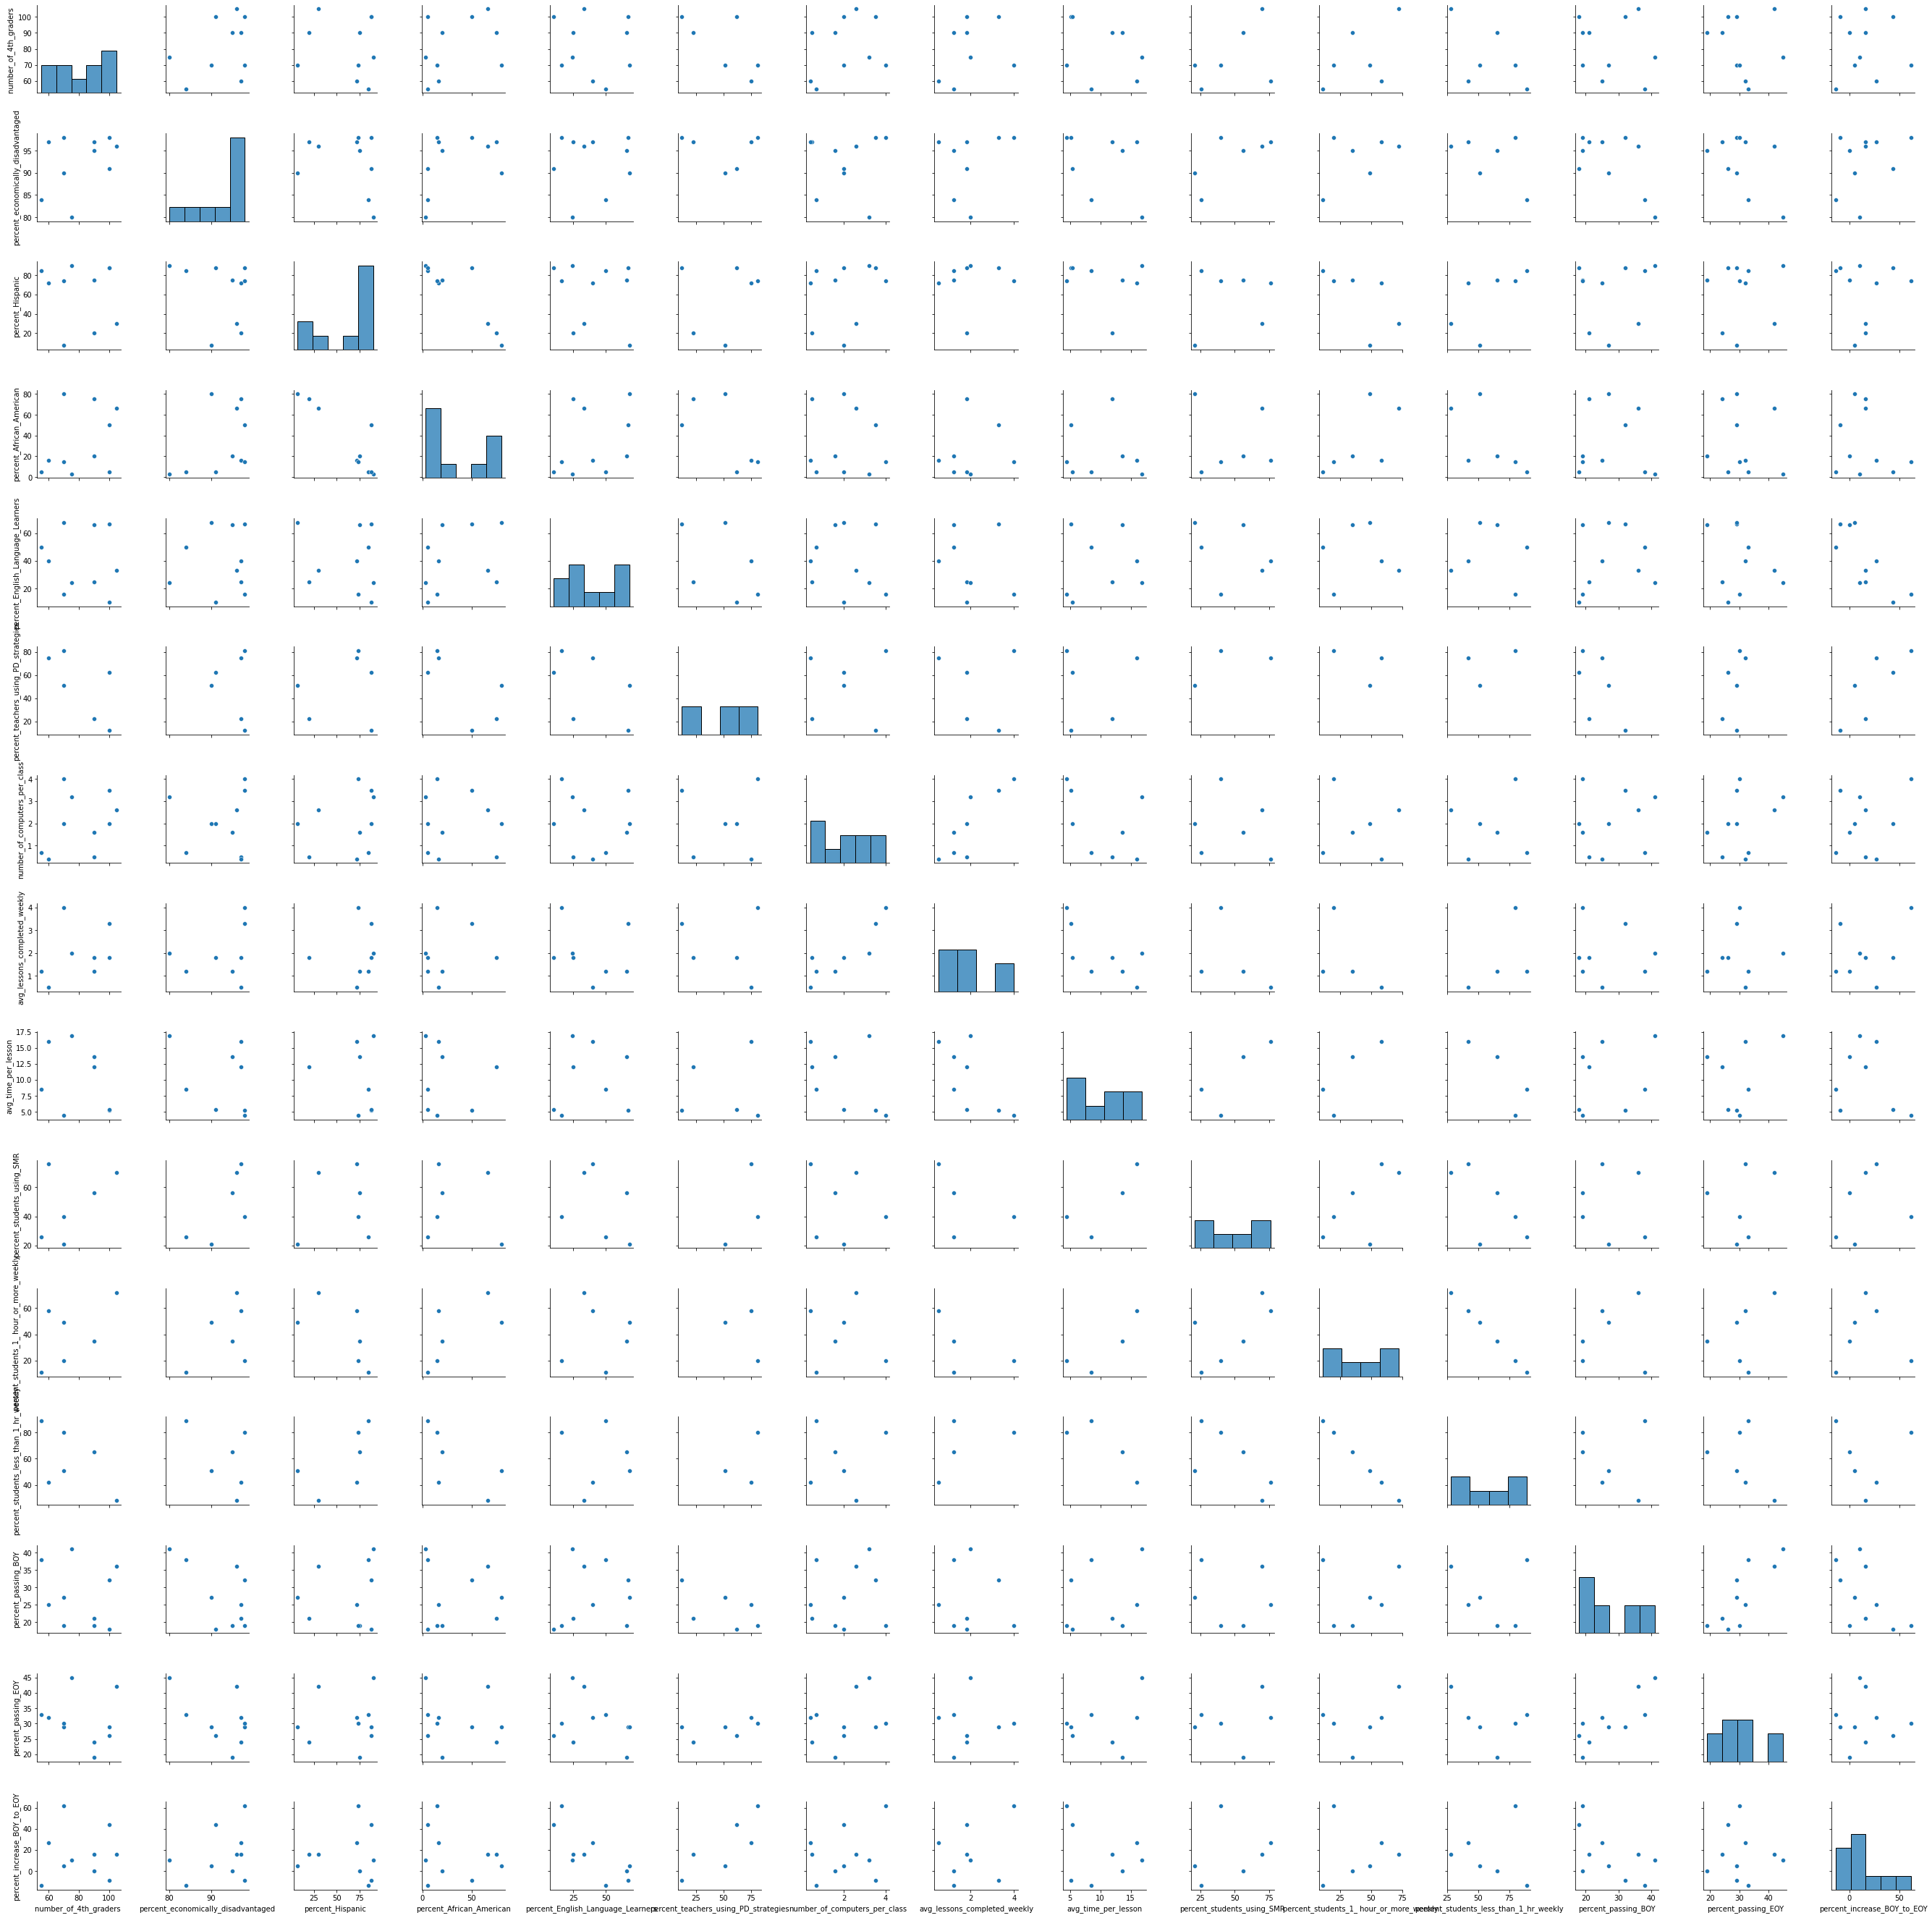

In [16]:
sns.pairplot(data2_df)
plt.show()

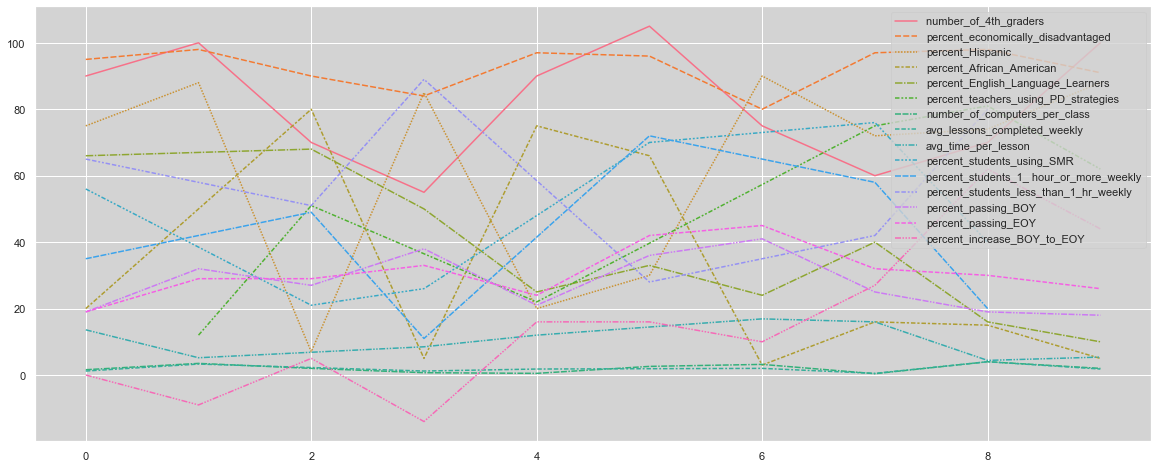

In [17]:
plt.figure(figsize=(20,8))
sns.set(rc={"axes.facecolor":"#d3d3d3", "axes.grid": True})
sns.lineplot(data=data2_df)
plt.show()

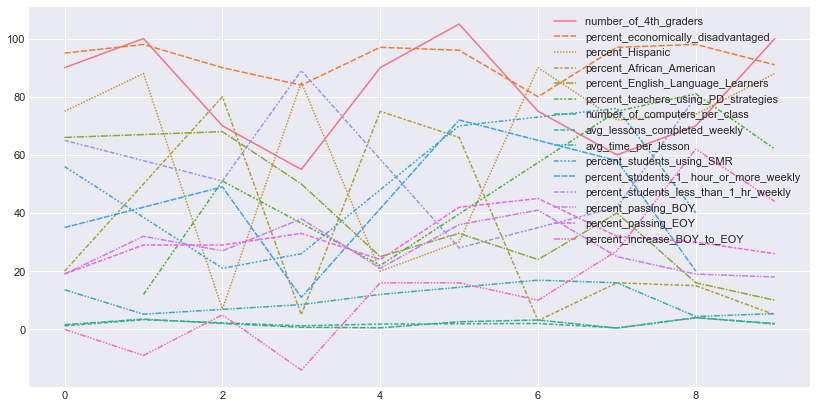

In [18]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(data=data2_df)
plt.show()

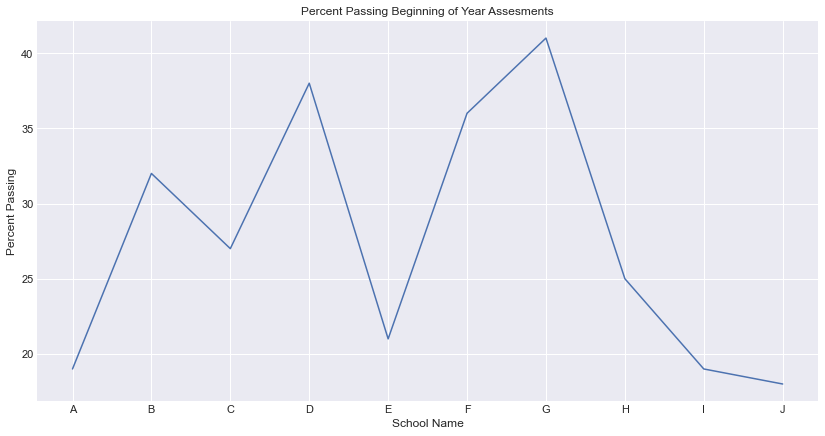

In [19]:
fig, ax = plt.subplots(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
lineplot = sns.lineplot(x="School_Name", y="percent_passing_BOY", data=data2_df)
sns.despine()
plt.ylabel('Percent Passing')
plt.xlabel('School Name')
plt.title('Percent Passing Beginning of Year Assesments')
plt.show()

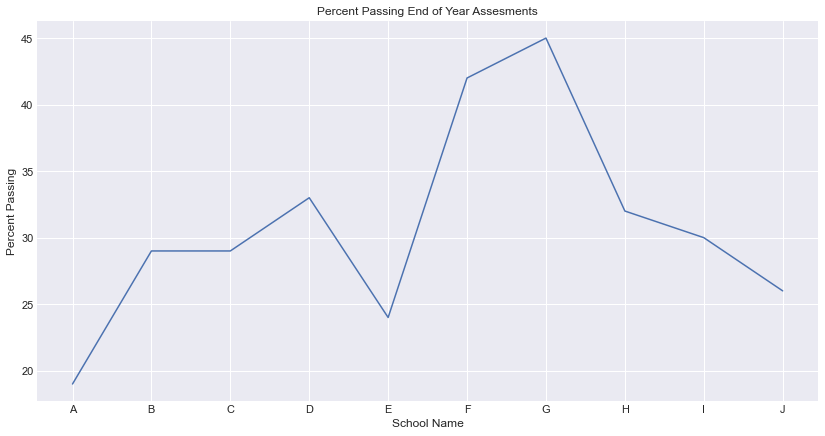

In [20]:
fig, ax = plt.subplots(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
lineplot = sns.lineplot(x="School_Name", y="percent_passing_EOY", data=data2_df)
sns.despine()
plt.ylabel('Percent Passing')
plt.xlabel('School Name')
plt.title('Percent Passing End of Year Assesments')
plt.show()

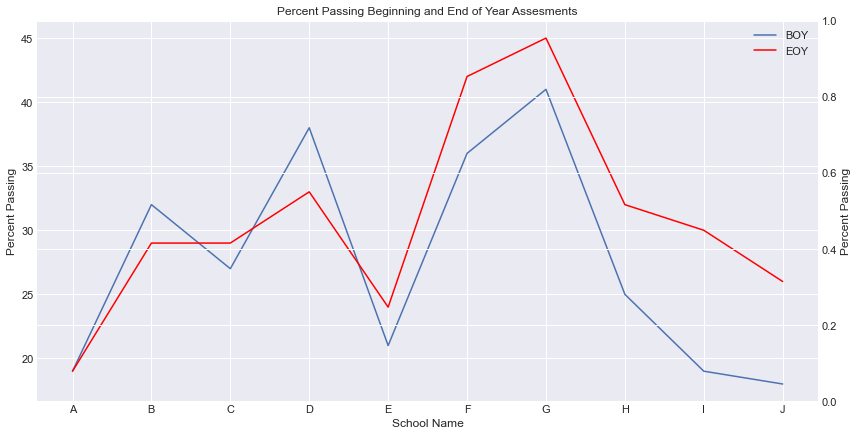

In [21]:
fig, ax = plt.subplots(figsize=(14,7))
lineplot = sns.lineplot(x="School_Name", y="percent_passing_BOY", data=data2_df, label='BOY', legend=False)
sns.despine()
plt.ylabel('Percent Passing')
plt.xlabel('School Name')
plt.title('Percent Passing Beginning and End of Year Assesments')

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x="School_Name", y="percent_passing_EOY", ax=ax, data=data2_df, label='EOY', color="red")
sns.despine(right=False)
plt.ylabel('Percent Passing')
plt.show()

In [22]:
# recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [23]:
data2_df.dtypes

School_Name                                 object
number_of_4th_graders                        int64
percent_economically_disadvantaged           int64
percent_Hispanic                             int64
percent_African_American                     int64
percent_English_Language_Learners            int64
teacher_attend_summer_PD                    object
percent_teachers_using_PD_strategies       float64
student_using_MathFast                      object
number_of_computers_per_class              float64
avg_lessons_completed_weekly               float64
avg_time_per_lesson                        float64
Use_Summer_Math_Review                      object
percent_students_using_SMR                 float64
percent_students_1_ hour_or_more_weekly    float64
percent_students_less_than_1_hr_weekly     float64
percent_passing_BOY                          int64
percent_passing_EOY                          int64
percent_increase_BOY_to_EOY                  int64
dtype: object

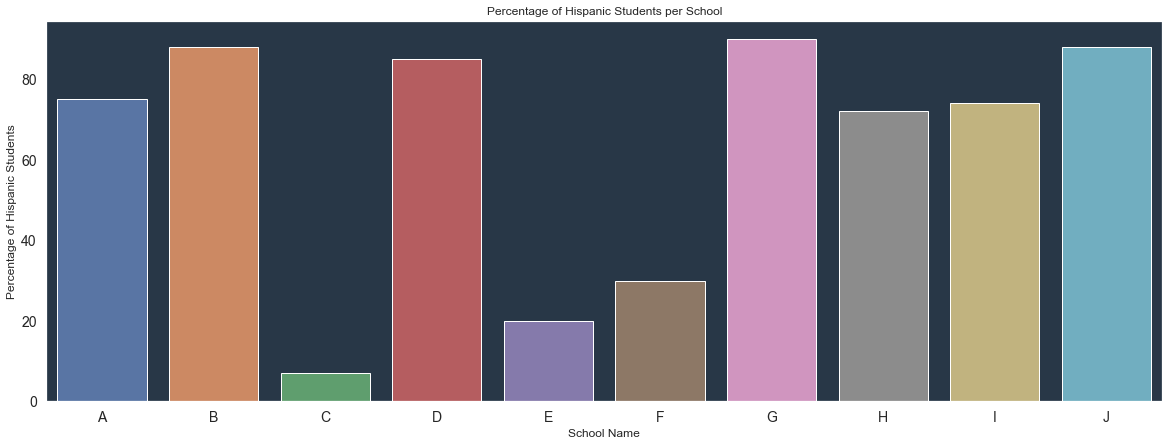

In [24]:
# bar chart of percentage of hispanic students
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False, 'xtick.labelsize':14, 'ytick.labelsize':14})
sns.barplot(x=data2_df['School_Name'], y=data2_df['percent_Hispanic'])
plt.ylabel('Percentage of Hispanic Students')
plt.xlabel('School Name')
plt.title('Percentage of Hispanic Students per School')
plt.show()

In [27]:
# recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

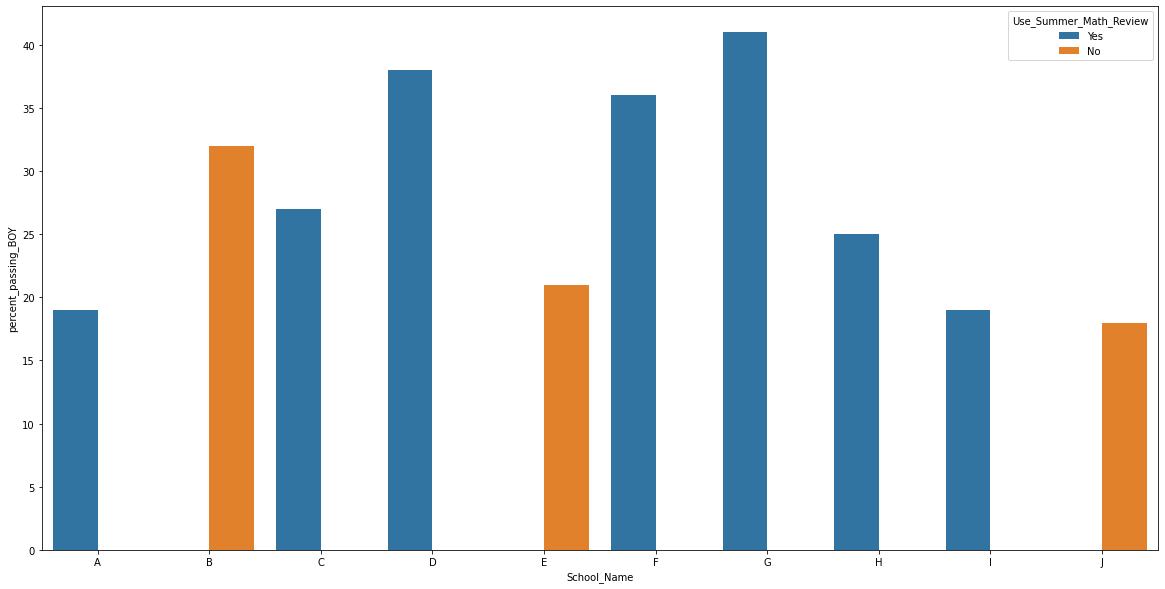

In [35]:
# How does summer math review affect BOY results?
plt.figure(figsize=(20,10))
sns.barplot(x=data2_df.School_Name, y=data2_df.percent_passing_BOY, hue=data2_df.Use_Summer_Math_Review)
plt.show()

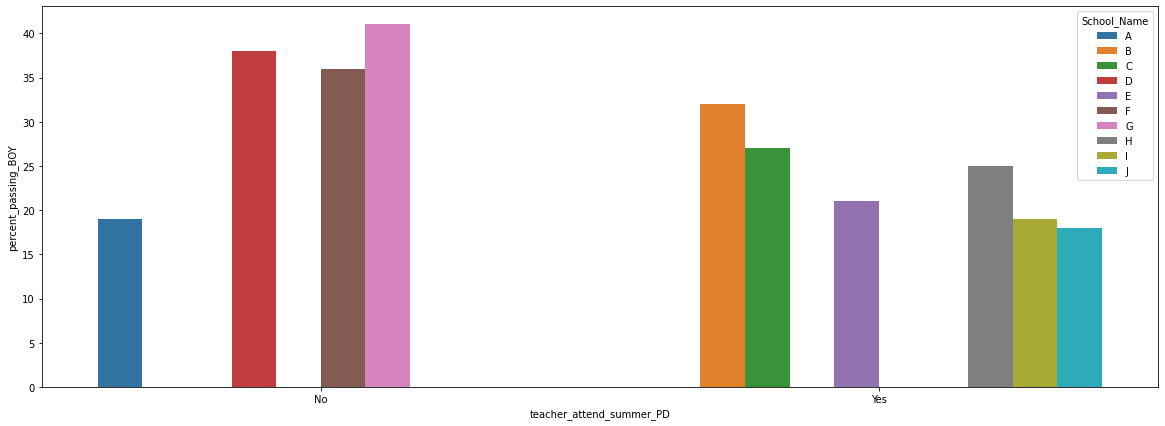

In [40]:
# how does teacher PD affect BOY results?
plt.figure(figsize=(20,7))
sns.barplot(x=data2_df.teacher_attend_summer_PD, y=data2_df.percent_passing_BOY, hue=data2_df.School_Name)
plt.show()

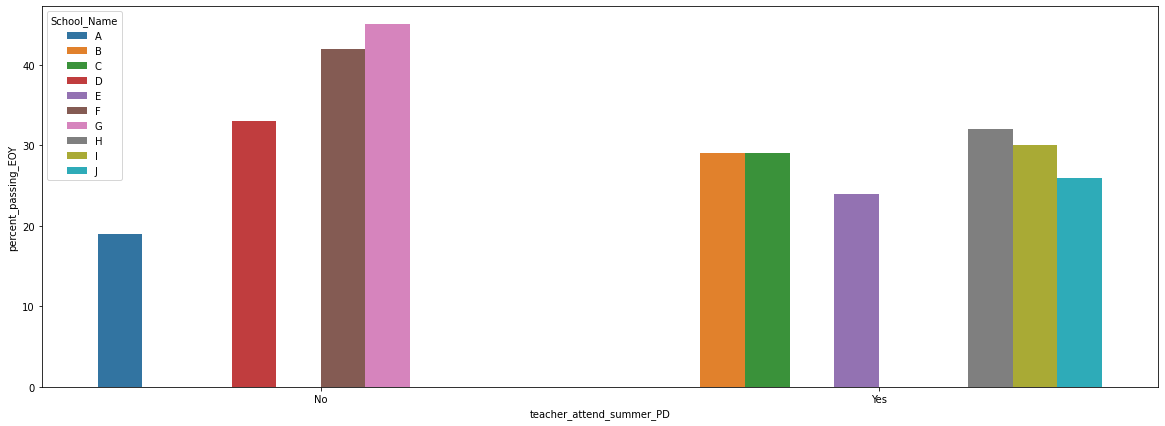

In [41]:
# how does teacher PD affect EOY results?
plt.figure(figsize=(20,7))
sns.barplot(x=data2_df.teacher_attend_summer_PD, y=data2_df.percent_passing_EOY, hue=data2_df.School_Name)
plt.show()

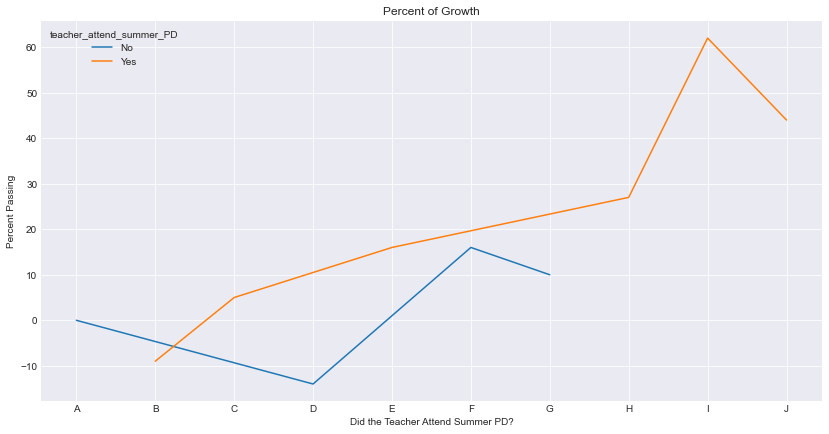

In [48]:
# how does teacher PD affect growth between BOY and EOY assesments?
fig, ax = plt.subplots(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
lineplot = sns.lineplot(x="School_Name", y="percent_increase_BOY_to_EOY", data=data2_df, hue="teacher_attend_summer_PD")
sns.despine()
plt.ylabel('Percent Passing')
plt.xlabel('Did the Teacher Attend Summer PD?')
plt.title('Percent of Growth')
plt.show()

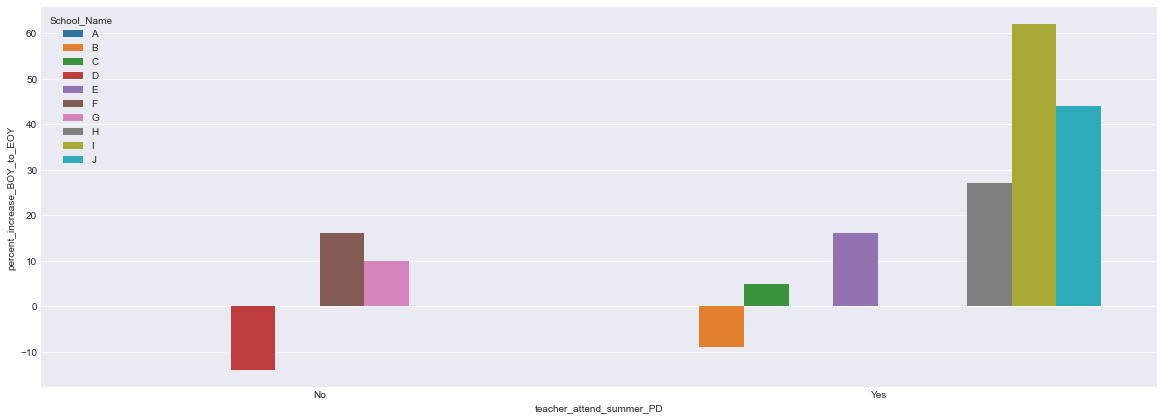

In [49]:
# how does teacher PD affect growth between BOY and EOY assesments?
plt.figure(figsize=(20,7))
sns.barplot(x=data2_df.teacher_attend_summer_PD, y=data2_df.percent_increase_BOY_to_EOY, hue=data2_df.School_Name)
plt.show()

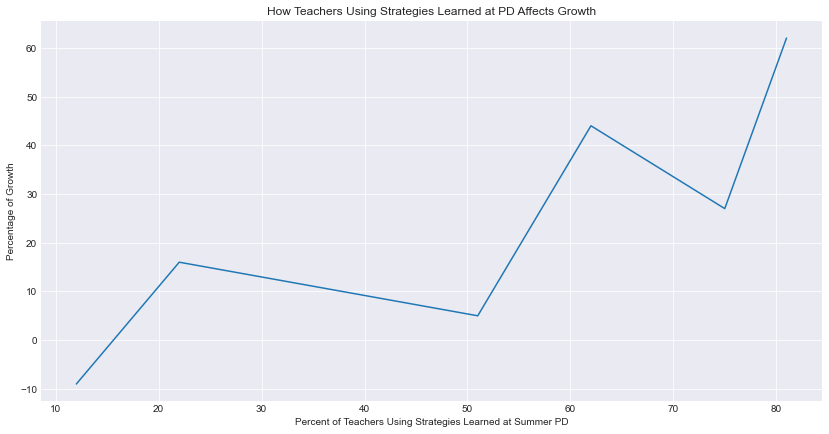

In [56]:
# how does a teacher implementing PD affect growth between BOY and EOY assesments?
fig, ax = plt.subplots(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
lineplot = sns.lineplot(x="percent_teachers_using_PD_strategies", y="percent_increase_BOY_to_EOY", data=data2_df)
sns.despine()
plt.ylabel('Percentage of Growth')
plt.xlabel('Percent of Teachers Using Strategies Learned at Summer PD')
plt.title('How Teachers Using Strategies Learned at PD Affects Growth')
plt.show()